In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date as dt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
focus_year = 2018

In [4]:
def get_X(year_value):
  factors = pd.read_csv('/content/drive/MyDrive/StockMaket/MergedDataFrame/FinancialIndicators_2021-06-20_v1.csv')
  factors['asOfDate'] = pd.to_datetime(factors['asOfDate'])
  factors = factors.where(factors['asOfDate'].dt.year == year_value)
  return ((factors.set_index('asOfDate')).dropna())#.set_index('symbol', append=True)
X = get_X(focus_year)

In [ ]:
#X = (X[X['symbol'] == 'MTN.JO']).drop(columns='symbol')

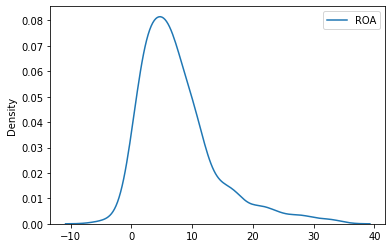

In [ ]:
sns.kdeplot(data=X[['ROA']])

In [5]:
def get_Y(year_value):
  prices = pd.read_csv('/content/drive/MyDrive/StockMaket/MergedDataFrame/Stock_Prices_'+str(year_value)+'_v1.csv')
  prices['date'] = pd.to_datetime(prices['date'])
  prices = prices.where(prices['date'].dt.year == year_value)
  prices = prices.set_index('date')
  prices = ((prices.resample('BM').mean()).resample('BQ').asfreq()).fillna(0)

  log_returns = (np.log(prices)).fillna(0)

  data = []

  for col in log_returns.columns:
    lr = pd.DataFrame(log_returns[col]) # lr -> log return
    lr['symbol'] = col
    lr['log_re'] = log_returns[col]
    data.append(lr)

  return ((pd.DataFrame(pd.concat(data)))[['symbol', 'log_re']])#.set_index('symbol', append=True)

y = get_Y(focus_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [ ]:
#y = (y[y['symbol'] == 'MTN.JO']).drop(columns='symbol')

## **Distributions**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


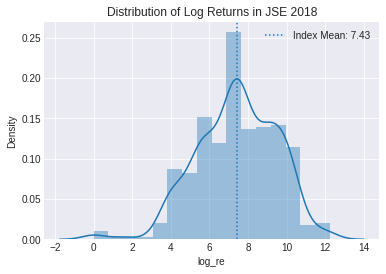

In [6]:
plt.style.use('seaborn-darkgrid')

sns.distplot(y.log_re, kde=True)
mean_return = y.log_re.mean()
plt.title('Distribution of Log Returns in JSE '+str(focus_year))
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend();

In [ ]:
print(f'X dimensions {X.shape}')
print(f'y dimensions {y.shape}')

X dimensions (524, 141)
y dimensions (524, 131)


### **X, y Variables One Hot Encoding**




In [7]:
X_cat = pd.get_dummies(X['symbol'], drop_first=True)
X = pd.concat([X_cat, X], axis=1)
X = X.drop('symbol', axis=1, inplace=False)

In [8]:
y_cat = pd.get_dummies(y['symbol'], drop_first=True)
y = pd.concat([y_cat, y], axis=1)
y = y.drop('symbol', axis=1)

## **Baseline Model**


In [9]:
# Two fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
ols = linear_model.LinearRegression()

In [11]:
ols = ols.fit(X_train, y_train)

In [12]:
y_prediction = ols.predict(X_test)

In [13]:
r2 = r2_score(y_test, y_prediction)
r2

0.5948817390101505

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge, X, y, cv=5)

## **Model Scores**

In [ ]:
r2 = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)